In [3]:
import music21
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
music21.converter.parse(little_star).show('mid')

In [84]:
# 데이터  sampling
# ABC 표기 데이터는 2채널(계이름과 박자), 분류문제
# x : [ [1,4],[1,4],[1,4] ... ]
# y : [4 4]- 원핫 000000000100000

In [4]:
import numpy as np

In [5]:
temp = ['c','d','e','f','g','a','b']
note2num = dict(zip(temp,np.arange(1,8)))
num2note =  { value:key for key,value in note2num.items()  }
note2num, num2note

({'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'a': 6, 'b': 7},
 {1: 'c', 2: 'd', 3: 'e', 4: 'f', 5: 'g', 6: 'a', 7: 'b'})

In [6]:
# 시계열 데이터 만들기
def abc2timeseries(s):
    return [ [note2num[i[0]], int(i[1]) ] for i in s.split()[2:] ]
temp = abc2timeseries(little_star)
temp[:5]

[[1, 4], [1, 4], [5, 4], [5, 4], [6, 4]]

In [7]:
def timeseries2abc(t):
    return "tinynotation: 4/4 "+" ".join([num2note[i]+str(j) for i,j in t])
timeseries2abc(temp)    

'tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2'

In [8]:
# 원핫 코드로 변환하는 표
#[  [1,2],[2,2],..[7,2], ]
onehot = [[i,2] for i in range(1,8)] + [[i,4] for i in range(1,8)] + [[i,8] for i in range(1,8)]

In [9]:
seq = abc2timeseries(little_star)
seq[:5]

[[1, 4], [1, 4], [5, 4], [5, 4], [6, 4]]

In [10]:
# 시계열 데이터 만들기
w = 8  # 윈도우 크기
h = 1  # 수평 계수
def seq2dadtaset(seq,w,h):
    x,y = [],[]
    for i in range(len(seq)-(w+h)+1):        
        x.append(seq[i:(i+w)])
        y.append(seq[i+w+h-1])
    return np.array(x), np.array(y)   

In [11]:
X,Y = seq2dadtaset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import tensorflow as tf

In [13]:
# 훈련데이터
split = int(len(X)*1.0)  # 100% 훈련집합으로 사용
x_train = X[:split]; y_train = Y[:split]

In [14]:
def to_onehot(y):
    t = []
    for i in range(len(y)):
        a = np.zeros(len(onehot))
        a[onehot.index(list(y[i])  )] = 1.0    # 예측이 목적이 아니라 생성이 목적이기 때문에 전체를 훈련집합으로
        t.append(a)
    return np.array(t)

In [15]:
y_train = to_onehot(y_train)

In [16]:
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [17]:
x_train.shape,y_train.shape,x_train[0].shape

((34, 8, 2), (34, 21), (8, 2))

In [18]:
# 모델 학습
model = Sequential([
    LSTM(units=128,activation='relu',input_shape = x_train[0].shape),  # (8,2)
    Dense(y_train.shape[1],activation='softmax'),  # 출력은 y의 원핫코드의 길이 21    
])

In [19]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['acc'])

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
34/34 [==============================] - 1s 3ms/step - loss: 2.9091 - acc: 0.0668
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 2.4406 - acc: 0.1359
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 2.1535 - acc: 0.2936
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 1.7994 - acc: 0.1887
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 1.9271 - acc: 0.3295
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 1.7879 - acc: 0.4289
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 1.5646 - acc: 0.4429
Epoch 8/10
34/34 [==============================] - 0s 3ms/step - loss: 1.8339 - acc: 0.2778
Epoch 9/10
34/34 [==============================] - 0s 3ms/step - loss: 1.5340 - acc: 0.3492
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 1.6409 - acc: 0.3822


In [21]:
new_song = []
for i in range(50):
    idx = np.random.randint( len(x_train))  # 랜덤하게 x_train범위에서 인덱스 설정
    p = model.predict(np.expand_dims(x_train[idx],axis=0),verbose=0)
    new_song.append( onehot[np.argmax(p)])
timeseries2abc(new_song)
music21.converter.parse(timeseries2abc(new_song)).show('mid')

In [22]:
timeseries2abc(new_song)

'tinynotation: 4/4 g4 g4 g4 f4 d4 f4 d4 d4 e4 f4 e4 g4 g4 g4 d4 e4 d4 e4 d4 f4 f4 g4 g4 g4 g4 f4 d4 d4 d4 d4 d4 f4 d4 f4 d4 g4 g4 g4 g4 d4 g4 g4 g4 d4 g4 g4 g4 g4 g4 g4'

In [32]:
# 악보그리기
# https://musescore.org/en/download  다운로드 및 설치
from music21 import converter,environment
score = converter.parse(timeseries2abc(new_song))
environment.set('musescoreDirectPNGPath','C:/Program Files/MuseScore 4/bin/MuseScore4.exe')
score.show('musicxml.png')

In [33]:
# 여러곡 편곡

# 봄나들이
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
# 나비야 나비야
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"

In [34]:
music21.converter.parse(butterfly).show('mid')

In [35]:
# 세 곡을 시계열로 변환하고 결합
list_data = []
for i in [little_star,spring_picnic,butterfly]:
    list_data += abc2timeseries(i)
list_data[:5], np.array(list_data).shape    

([[1, 4], [1, 4], [5, 4], [5, 4], [6, 4]], (124, 2))

In [36]:
X,Y = seq2dadtaset(list_data,w,h)
print(X.shape, Y.shape)
# 훈련데이터
split = int(len(X)*1.0)  # 100% 훈련집합으로 사용
print(split)
x_train = X[:split]; y_train = Y[:split]
print(x_train.shape, y_train.shape)
y_train = to_onehot(y_train)
print(x_train.shape, y_train.shape)
# 모델 설계는 이전형태 그대로 사용하고 학습만 새로운 데이터로 학습
# 모델 학습
model = Sequential([
    LSTM(units=128,activation='relu',input_shape = x_train[0].shape),  # (8,2)
    Dense(y_train.shape[1],activation='softmax'),  # 출력은 y의 원핫코드의 길이 21    
])
model.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['acc'])
model.fit(x_train,y_train,epochs=10,batch_size=1)

(116, 8, 2) (116, 2)
116
(116, 8, 2) (116, 2)
(116, 8, 2) (116, 21)
Epoch 1/10
116/116 [==============================] - 1s 2ms/step - loss: 2.7482 - acc: 0.1674 ETA: 0s - loss: 2.7601 - acc: 0.165
Epoch 2/10
116/116 [==============================] - 0s 2ms/step - loss: 2.3464 - acc: 0.2378
Epoch 3/10
116/116 [==============================] - 0s 3ms/step - loss: 2.1289 - acc: 0.3284
Epoch 4/10
116/116 [==============================] - 0s 2ms/step - loss: 2.2355 - acc: 0.2206
Epoch 5/10
116/116 [==============================] - 0s 2ms/step - loss: 2.1278 - acc: 0.4069
Epoch 6/10
116/116 [==============================] - 0s 2ms/step - loss: 2.1356 - acc: 0.2976
Epoch 7/10
116/116 [==============================] - 0s 2ms/step - loss: 2.0006 - acc: 0.3759
Epoch 8/10
116/116 [==============================] - 0s 2ms/step - loss: 1.9129 - acc: 0.4566
Epoch 9/10
116/116 [==============================] - 0s 2ms/step - loss: 2.0513 - acc: 0.3412
Epoch 10/10
116/116 [====================

In [37]:
new_song = []
for i in range(50):
    idx = np.random.randint( len(x_train))  # 랜덤하게 x_train범위에서 인덱스 설정
    p = model.predict(np.expand_dims(x_train[idx],axis=0),verbose=0)
    new_song.append( onehot[np.argmax(p)])
print(timeseries2abc(new_song))
music21.converter.parse(timeseries2abc(new_song)).show('mid')

tinynotation: 4/4 e8 e8 g4 e8 e8 e8 e8 e8 e8 e8 e8 e8 e8 g4 e8 g8 e8 e8 g8 g4 e4 f4 e8 e8 e4 f4 e4 g8 e4 c4 g8 g8 f4 e8 e8 e8 e8 f4 f4 e8 f4 f4 e4 e4 e8 e8 e8 g8 e8 c4


In [38]:
# 악보그리기
# https://musescore.org/en/download  다운로드 및 설치
from music21 import converter,environment
score = converter.parse(timeseries2abc(new_song))
environment.set('musescoreDirectPNGPath','C:/Program Files/MuseScore 4/bin/MuseScore4.exe')
score.show('musicxml.png')

In [39]:
print(timeseries2abc(new_song))

tinynotation: 4/4 e8 e8 g4 e8 e8 e8 e8 e8 e8 e8 e8 e8 e8 g4 e8 g8 e8 e8 g8 g4 e4 f4 e8 e8 e4 f4 e4 g8 e4 c4 g8 g8 f4 e8 e8 e8 e8 f4 f4 e8 f4 f4 e4 e4 e8 e8 e8 g8 e8 c4


In [40]:
# 기타 악보
from music21 import instrument

In [41]:
guitar = instrument.Guitar()
score.insert(0,guitar)
score.write('midi','guitar_score.mid')

'guitar_score.mid'

In [ ]:
import aubio
import music21
import subprocess

# Step 1: Audio to MIDI Conversion
def mp3_to_midi(mp3_file, midi_file):
    cmd = f'aubionotes {mp3_file} -O {midi_file}'
    subprocess.call(cmd, shell=True)

mp3_file = 'your_input.mp3'
midi_file = 'output.midi'
mp3_to_midi(mp3_file, midi_file)

# Step 2: MIDI Analysis
def analyze_midi(midi_file):
    midi_stream = music21.converter.parse(midi_file)
    # Extract notes, their durations, and other musical information from the MIDI file
    # You may need to process and filter the data based on your specific needs

# Step 3: Notation Generation
def generate_notation(midi_data):
    # Using LilyPond or another notation tool, generate guitar sheet music notation
    # The specific code for this step will depend on the notation tool you choose

# Example usage
midi_data = analyze_midi(midi_file)
generate_notation(midi_data)


C:\Users\User\anaconda3\lib\site-packages\music21\musicxml\m21ToXml.py:510: MusicXMLWarning: <music21.stream.Score 0x1eaa8b89430> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


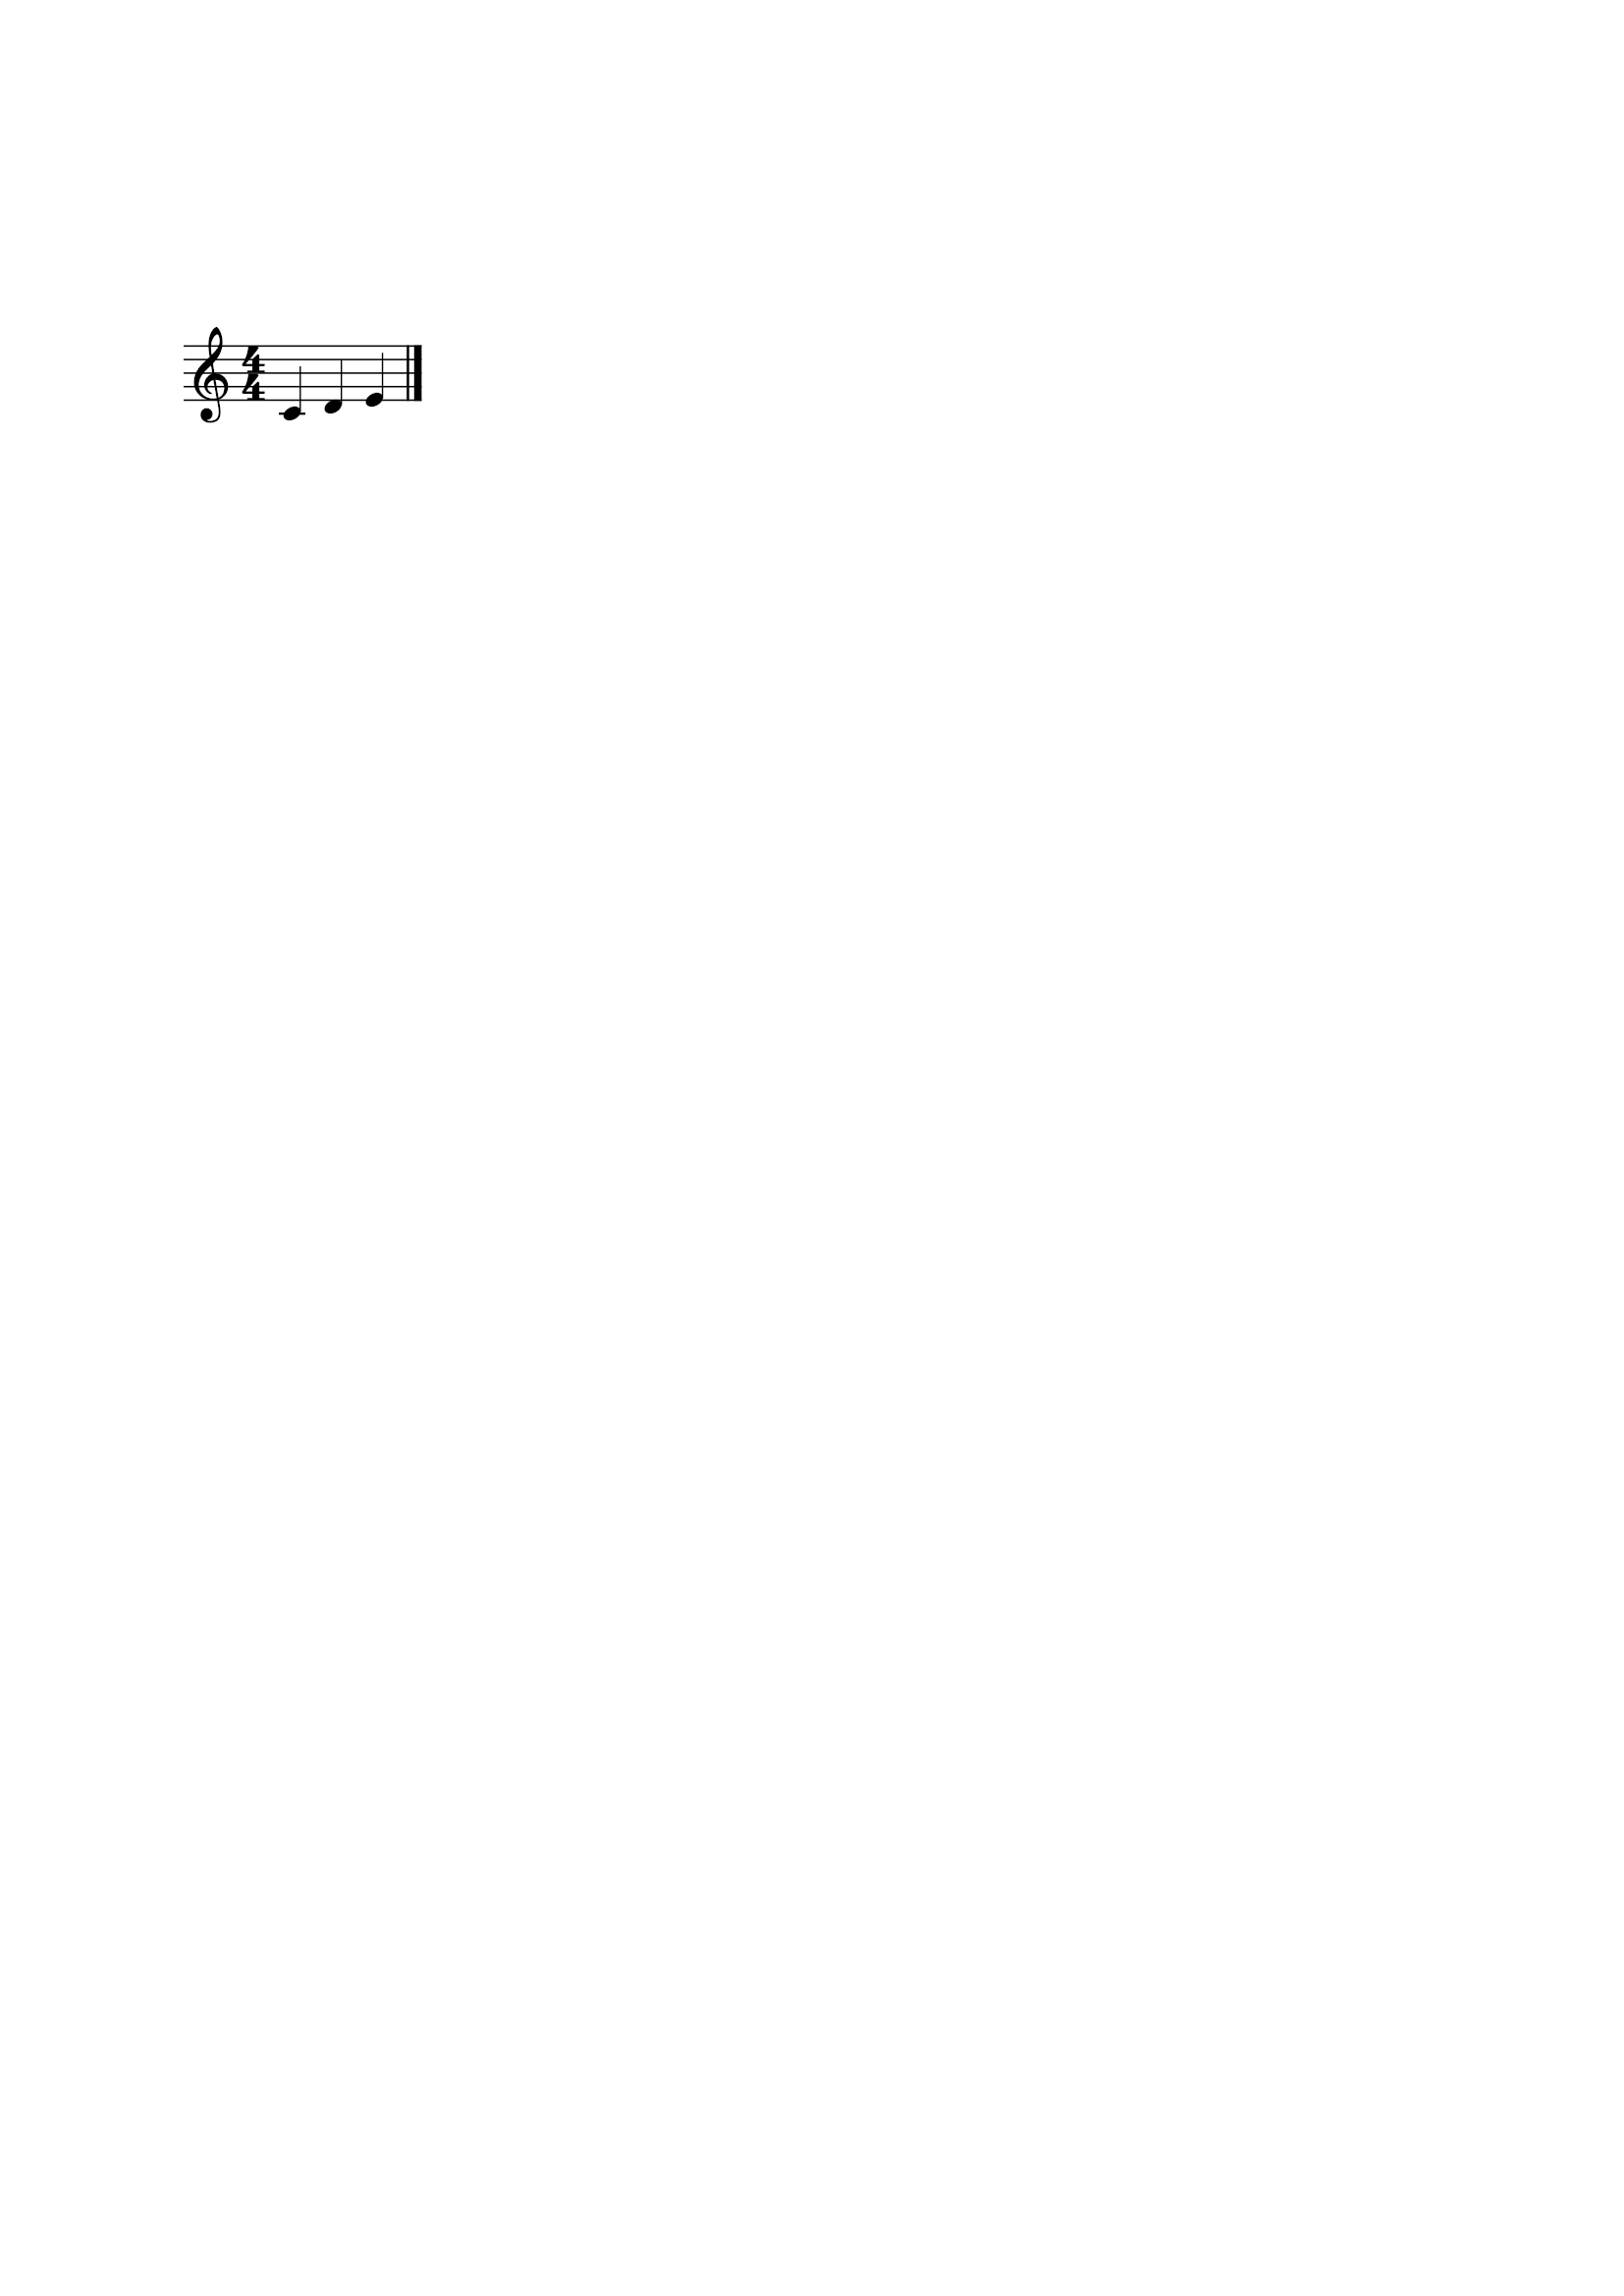

In [43]:
from music21 import instrument, note, stream

# 기타 악기 생성
guitar = instrument.Guitar()

# 악보 생성
score = stream.Score()
score.append(guitar)

# 음표 생성
note1 = note.Note('C4')
note2 = note.Note('D4')
note3 = note.Note('E4')

# 음표 추가
score.insert(0, note1)
score.insert(1, note2)
score.insert(2, note3)

# 악보 출력
score.show()

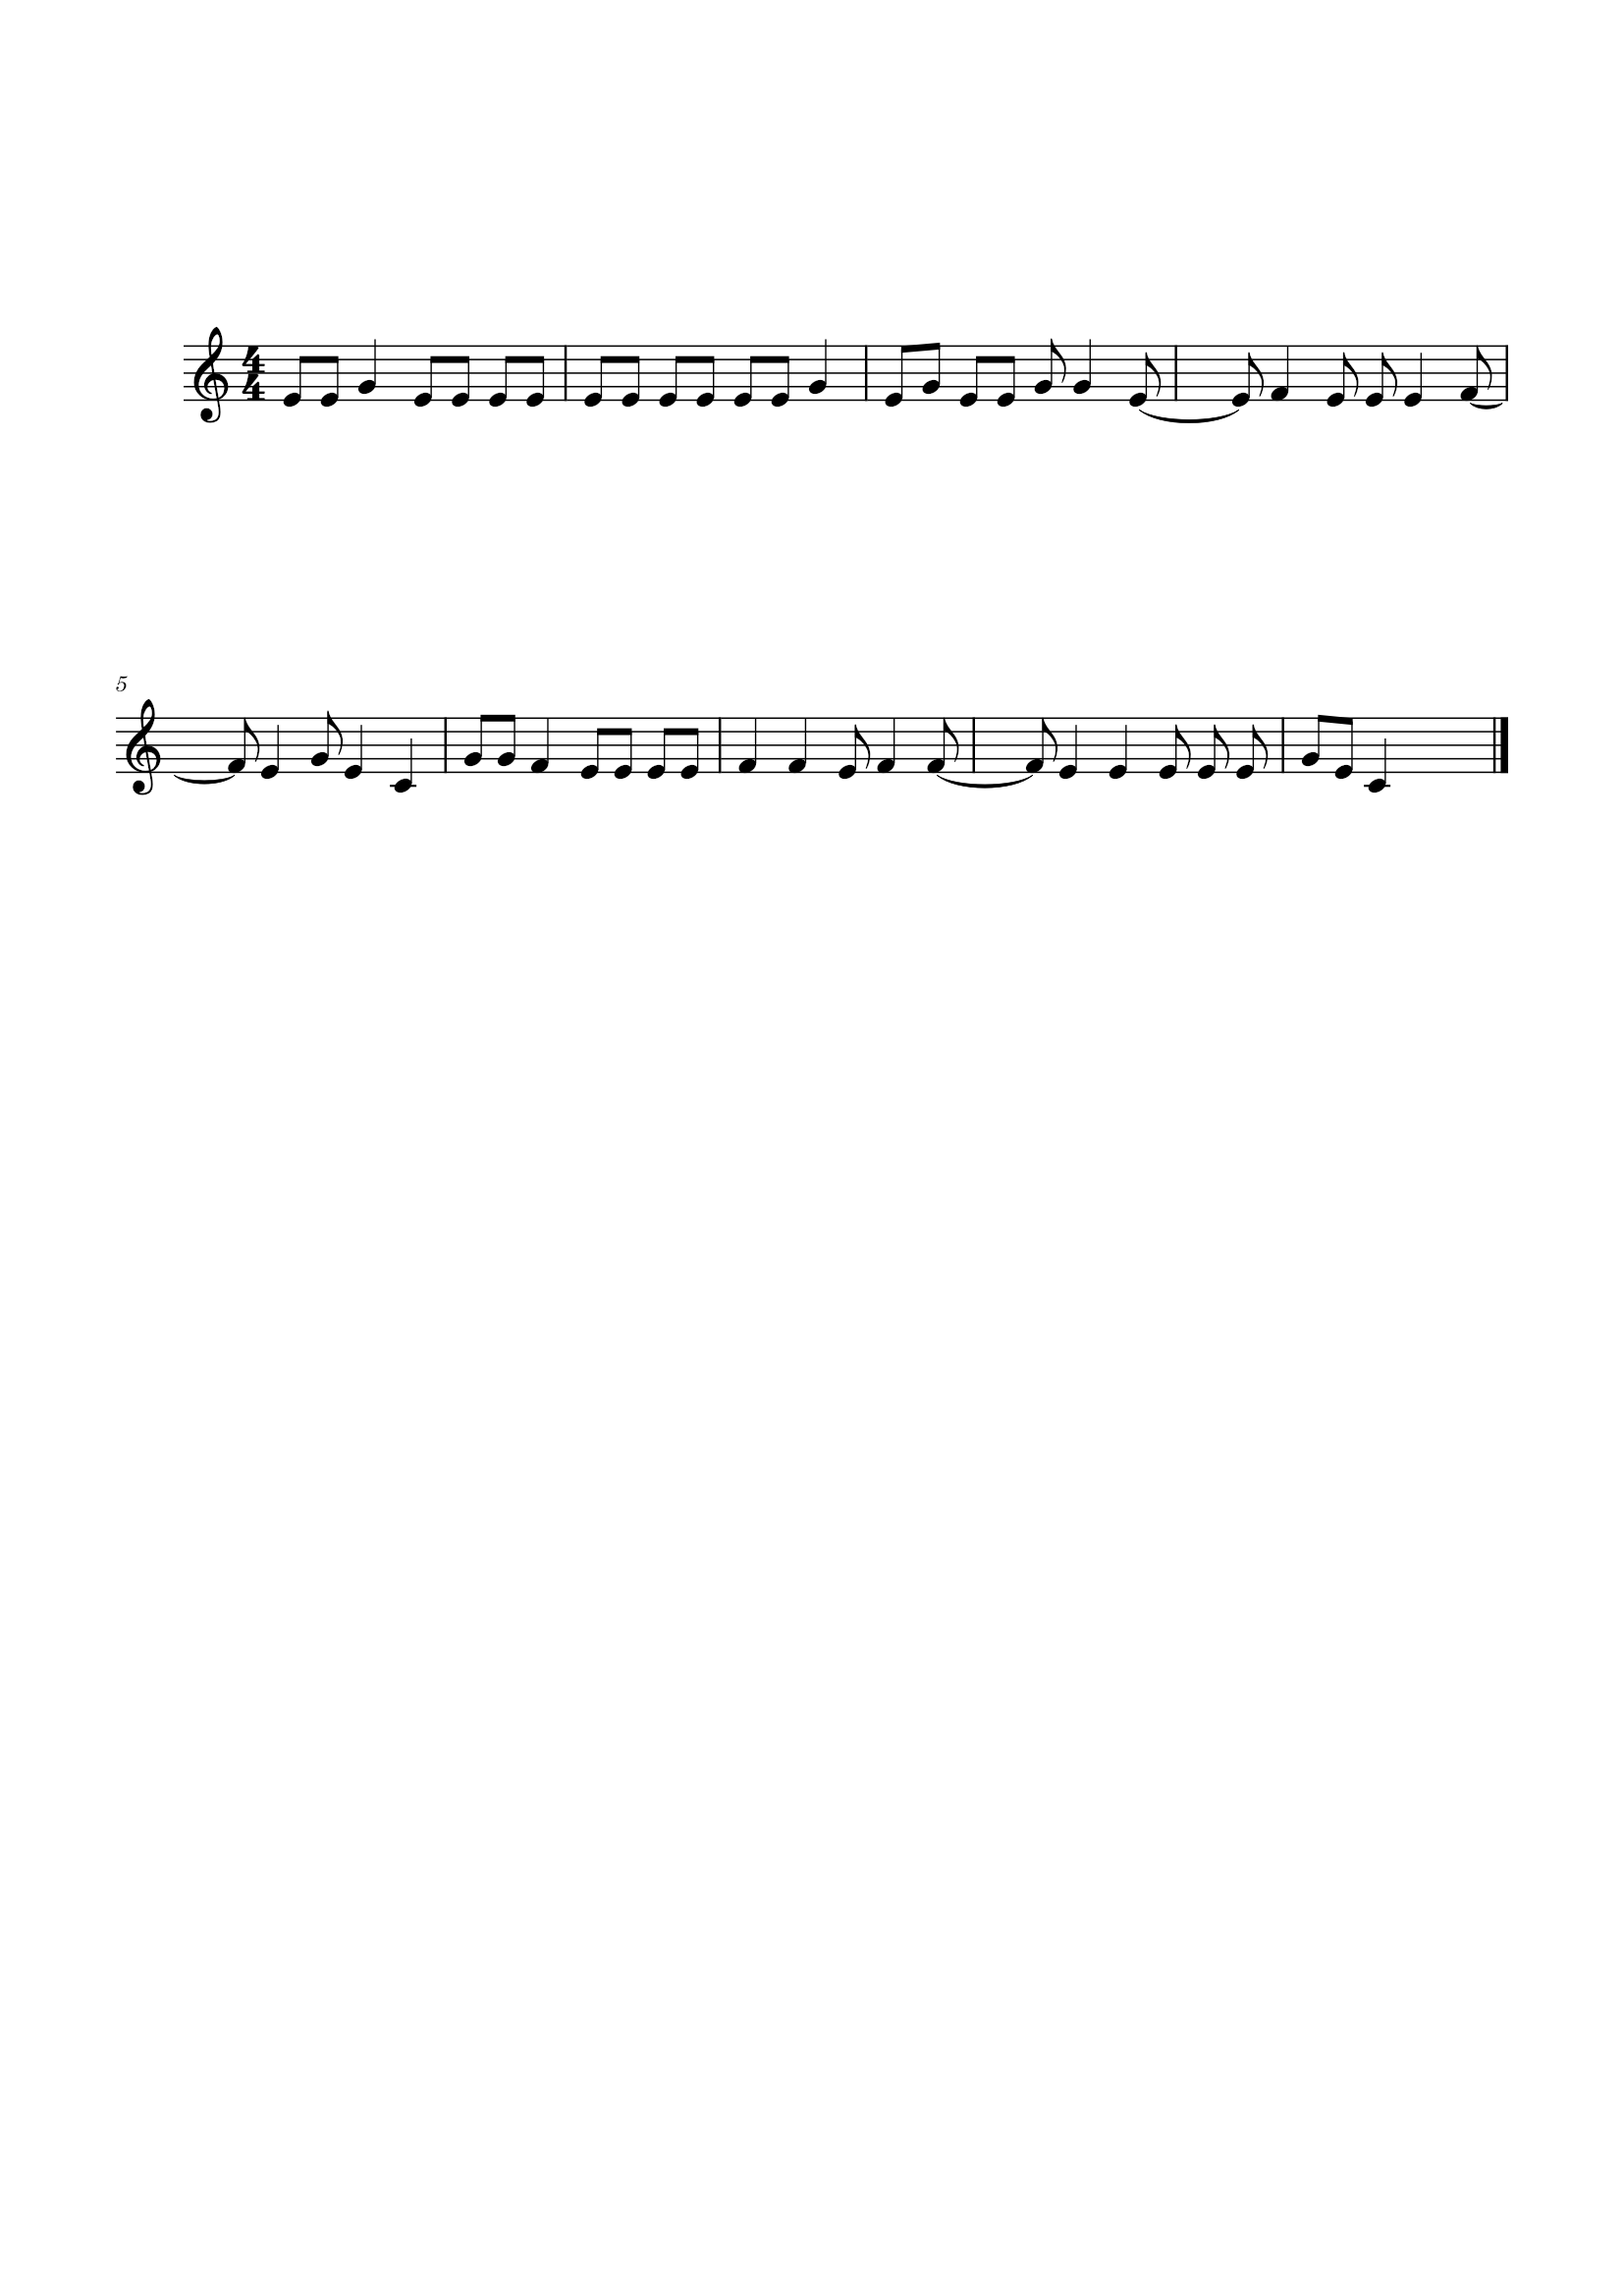

In [42]:
score.show()

In [2]:
!pip install music21